In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc, cm
import matplotlib as mpl

# 마이너스 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

import sklearn

# 선형회귀모델
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 회귀분석 - 단순선형
* 상관이 있다고 해서 인과관계가 있다고 할 수 없음.
* 하지만, 인과관계가 있다고 하면 회귀분석이 가능하고 반드시 상관관계가 있다.

## 데이터 준비

In [3]:
file_path = 'https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv'

raw = pd.read_csv(file_path)
df = raw.copy()
print(df.shape)
df.head(2)

(398, 7)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
count,398.000000,398.000000,398.000000,396.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.189394,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.402030,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


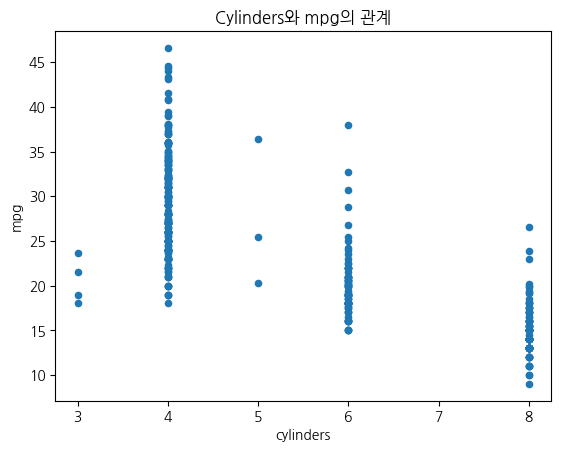

In [8]:
## 상관관계 확인하기 - scatterplot
# 종속변수 (mpg >> km/l 연비)
df.plot(kind='scatter', x='cylinders', y='mpg')
plt.title('Cylinders와 mpg의 관계')
plt.show()

## 결측치 처리

In [9]:
# 결측값이 있는 행 전체 제거하기
df = df.dropna(axis=0)

## 분석 데이터 준비

In [10]:
## weight - mpg
# 독립변수
X = df[['weight']]
# 종속변수
y = df.mpg

# training / test data
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(316, 1) (316,) (80, 1) (80,)


## 모델링 - 단순선형회귀

In [11]:
# 모델 생성
model = LinearRegression()

# fitting
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# 회귀식의 가중치(weight)와 편향(bias)
print('가중치 (weight) :', model.coef_[0])
print('편향 (bias) :', model.intercept_)

가중치 (weight) : -0.007950936662254864
편향 (bias) : 47.30893759102081


## 모델 성능 평가

In [15]:
from sklearn.metrics import r2_score

# 예측 - test data
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('R^2 score (test data) :', r2)

# 예측 - training data
y_train_pred = model.predict(X_train)

r2 = r2_score(y_train, y_train_pred)
print('R^2 score (training data) :', r2)

R^2 score (test data) : 0.6205049942063274
R^2 score (training data) : 0.705422183951529


성능평가 해석
* 모델의 설명력이 r2로 정확도가 r2*100%이다.

변수가 많지 않다면, 단순선형으로 독립변수와 종속변수의 관계를 확인한다.

그 후, 다중선형회귀를 진행한다.

## 추가 분석
* 상관 분석에서 상관관계를 보이는 개별 독립변수와 종속변수 회귀 분석을 진행!

In [16]:
# 변수들 간의 상관관계 분석
corr = df.corr(method='pearson') # pearson : 연속형 변수
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
mpg,1.000000,-0.775680,-0.804711,-0.777575,-0.832725,0.421159,0.581144
cylinders,-0.775680,1.000000,0.950706,0.843751,0.896058,-0.504844,-0.352554
displacement,-0.804711,0.950706,1.000000,0.897787,0.932729,-0.542713,-0.374620
horsepower,-0.777575,0.843751,0.897787,1.000000,0.864350,-0.687241,-0.420697
weight,-0.832725,0.896058,0.932729,0.864350,1.000000,-0.415462,-0.311774
acceleration,0.421159,-0.504844,-0.542713,-0.687241,-0.415462,1.000000,0.294588
model-year,0.581144,-0.352554,-0.374620,-0.420697,-0.311774,0.294588,1.000000


상관계수는 0.4 정도는 나와야 상관성이 있다고 볼 수 있음.

# 다중 선형 회귀

## 데이터 준비

In [18]:
file_path = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'

raw = pd.read_csv(file_path)
df = raw.copy()
print(df.shape)
df.head(2)

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [20]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## EDA - 결측치 처리

In [22]:
# 결측치 있는 행 제거하기
df = df.dropna(axis=0)

In [23]:
# 범주형 데이터 >> 분석 제외하기
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [24]:
df = df.drop(columns='ocean_proximity')
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0


## EDA - 상관분석

In [25]:
corr = df.corr(method='pearson')
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


## 분석 데이터 준비

In [26]:
# 종속변수 : median_house_value
y = df.median_house_value
# 독립변수
X = df.drop(columns='median_house_value', axis=1)

# training / test data 준비 (7:3)
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(14303, 8) (14303,) (6130, 8) (6130,)


## 모델링

In [27]:
# 모델 생성
model = LinearRegression()

# fitting
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# 가중치 , 편향
print('가중치 (weight, 회귀계수) :', model.coef_)
print('편향 (bias) :', model.intercept_)

가중치 (weight, 회귀계수) : [-4.21262308e+04 -4.20623763e+04  1.18784999e+03 -8.57874086e+00
  1.18123421e+02 -3.55751755e+01  3.73676747e+01  4.03297253e+04]
편향 (bias) : -3530241.30779682


## 모델 성능 평가

In [29]:
# 예측 - test data
y_pred = model.predict(X_test)

# 성능 평가
r2 = r2_score(y_test, y_pred)
print('R2 score (test data) :', r2)

# 예측 - training data
y_train_pred = model.predict(X_train)

# 성능 평가
r2 = r2_score(y_train, y_train_pred)
print('R2 score (training data) :', r2)

R2 score (test data) : 0.6445130291082347
R2 score (training data) : 0.6334125389213838


## 모델 간 비교 - DecisionTreeRegressor

In [30]:
from sklearn.tree import DecisionTreeRegressor

# 모델 생성
model = DecisionTreeRegressor(max_depth=3, random_state=42)

# fitting
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [31]:
from sklearn.metrics import r2_score, mean_squared_error

In [32]:
print('===== DecisionTreeRegressor =====')
# 예측 - test data
y_pred = model.predict(X_test)

# 성능 평가
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R2 score (test data) :', r2)
print('MSE (test data) :', mse)

# 예측 - training data
y_train_pred = model.predict(X_train)

# 성능 평가
r2 = r2_score(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
print('R2 score (training data) :', r2)
print('MSE (test data) :', mse)

===== DecisionTreeRegressor =====
R2 score (test data) : 0.4904256471420084
MSE (test data) : 6793101269.876856
R2 score (training data) : 0.4982482154787856
MSE (test data) : 6684086804.552605


## 모델 간 비교 - RandomForestRegressor
* 무조건 쓰기 !! 중요함.

In [33]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
model = RandomForestRegressor(max_depth=3, random_state=42)

# fitting
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [34]:
print('===== RandomForestRegressor =====')
# 예측 - test data
y_pred = model.predict(X_test)

# 성능 평가
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('TEST DATA')
print('R2 score :', r2)
print('MSE :', mse)

# 예측 - training data
y_train_pred = model.predict(X_train)

# 성능 평가
r2 = r2_score(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
print('TRAINING DATA')
print('R2 score :', r2)
print('MSE :', mse)

===== RandomForestRegressor =====
TEST DATA
R2 score : 0.5163257607399465
MSE : 6447828605.376922
TRAINING DATA
R2 score : 0.5238959090558103
MSE : 6342421033.759215


MSE 결과 해석 방법
* training과 test와 비교하기
    * 수치 그대로 보기. ==> MSE가 다소 높게 나옴.
    * test의 MSE가 train의 MSE보다 살짝 높은 것이 맞음.
* 모델 간의 MSE 비교하기 (모델 개수는 최소 3개)
    * 위의 예시로 본다면, decisionTree보다 오차가 작기 때문에 약간 개선된 모델이라고 판단가능하다.
* 높고 낮음 판단 방법
    * 종속변수의 기초통계량을 확인해서 판단함. (보통 10%)
    * ex) 종속변수의 평균 = 1000, mse = 10 : 작은 오차 / 종속변수의 평균 = 100, mse = 10 : 큰 오차
    * ==> 상대적으로 비교해야 함.

R2 결과 해석 방법
* 모델의 정확도 : r2_score*100 %

r2_score : 95% 이상 / mse_test : 2000 (mse_train : 1800) 인 경우
* 설명력 우수 (왜냐면 정확도가 높아) + 오차값이 낮아 안정적이다.
* 타 모델과 비교 시, 예측력이 개선되었음을 확인할 수 있다.

성능 평가
* mse / rmse / mae / mape 등

# 비지도 학습

In [35]:
from sklearn.cluster import KMeans

In [36]:
file_path = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"

raw = pd.read_csv(file_path)
iris = raw.copy()
print(iris.shape)
iris.head(2)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [38]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [40]:
# species의 date type이 object이기 때문에 인코딩 해준다.
from sklearn.preprocessing import LabelEncoder

# 인코더 생성
encoder = LabelEncoder()

# 적용
iris['species'] = encoder.fit_transform(iris.species)

iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


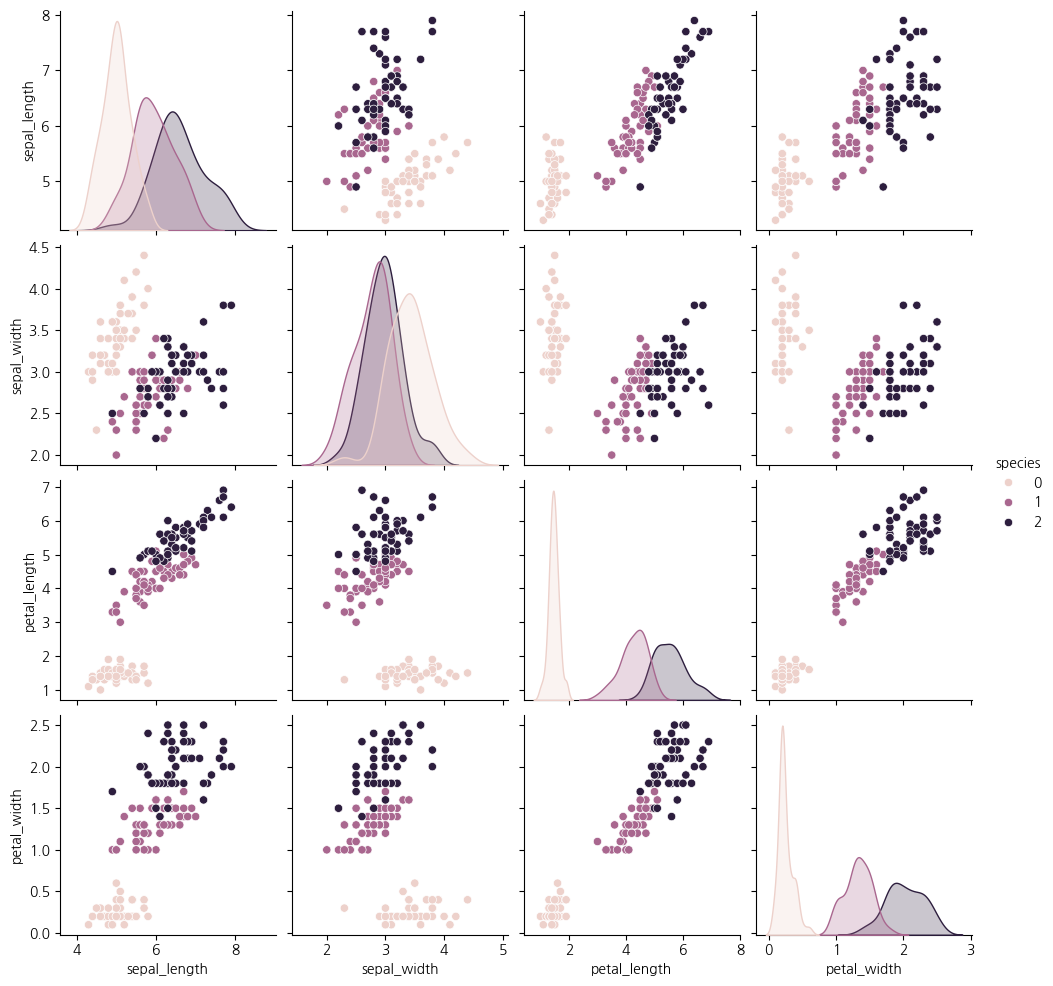

In [42]:
# 변수간 상관관계 시각화
# 3차원 옵션
from mpl_toolkits.mplot3d import Axes3D, proj3d

sns.pairplot(iris, hue='species') # 데이터 특징 간의 상관관계 표현
plt.show()

## 모델링

In [44]:
# 모델 생성
model_1 = KMeans(n_clusters=3, n_init=10, max_iter=500, random_state=42)

# fitting
model_1.fit(iris)

KMeans(max_iter=500, n_clusters=3, n_init=10, random_state=42)

In [45]:
# centroid 확인
model_1.

AttributeError: 'KMeans' object has no attribute 'centroid_'

In [ ]:
# 적절한 K값 찾기
scope = range(1, 10)

# 중심점 넣을 빈 리스트
inertias = []

for k in scope:
    # 모델 생성
    model = KMeans(n_clusters=k)
    # fitting
    model.fit(iris)
    inertias.append(model.inertia_)

In [ ]:
# k 개수와 inertia 비교 시각화
plt.figure(figsize=(4, 4))
plt.plot(scope, inertias, '-o')

plt.xlabel('Number of Cluster K')
plt.ylabel('inertia')

plt.show()

In [46]:
# 결과 해석
# ==> k=3이 적합한 변화 시점이라는 것을 알 수 있다.
#  + 반드시 실루엣 분석을 해야 한다.

# 연관 분석
* 끼워팔기, 묶음상품, 2 + 1

In [49]:
# !pip3 install mlxtend

In [50]:
from mlxtend.frequent_patterns import apriori, association_rules

In [51]:
path = '../datasets/ML_data/'

In [54]:
raw = pd.read_csv(path+'retail_dataset.csv', sep=',')
df = raw.copy()
print(df.shape)
df.head(2)

(315, 7)


,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       315 non-null    object
 1   1       285 non-null    object
 2   2       245 non-null    object
 3   3       187 non-null    object
 4   4       133 non-null    object
 5   5       71 non-null     object
 6   6       41 non-null     object
dtypes: object(7)
memory usage: 17.4+ KB


1. 장바구니 데이터 고유항목 구분 출력
    * index : 구매자 번호
    * value : 구매항목
2. 장바구니 목록 값을 수치로 표현함.
    * 매칭될 경우 1, 아니면 0 (one-hot encoding)
3. NaN 삭제
4. apriori 함수 적용
5. 연관규칙 도출
    * 신뢰도 임계치 0.6 기반

In [59]:
## 장바구니 데이터 고유항목 구분 출력 ##
# >> 각 열의 고유값 추출 (집합 형태)
item_set = set()

for col in df:
    item_set.update(df[col].unique())

print(item_set)

{nan, 'Wine', 'Eggs', 'Milk', 'Bagel', 'Diaper', 'Cheese', 'Bread', 'Pencil', 'Meat'}


In [61]:
## 장바구니 목록 값을 수치로 표현 ##
encoding = []

# 행별로 확인하기
for i, row in df.iterrows():
    # 구매자가 구매한 항목
    purchase_set = set(row)
    items_label = {}
    # 구매자가 구매하지 않은 항목
    buy = list(item_set - purchase_set)
    # 구매한 항목
    not_buy = list(item_set.intersection(purchase_set))

    # 구매한 항목이면 1, 아니면 0으로 표시하기
    for n in dismatch:
        items_label[n] = 0
    for m in match:
        items_label[m] = 1
    # 구매자의 구매항목을 1, 0으로 바꾼 것을 encoding 리스트에 넣기
    encoding.append(items_label)

print(encoding)

# 만들어진 리스트를 DF로 표현
purchase_df = pd.DataFrame(encoding) # index : 구매자 index / column : 구매항목
purchase_df

[{'Milk': 0, 'Cheese': 0, 'Pencil': 0, 'Diaper': 0, nan: 1, 'Wine': 1, 'Eggs': 1, 'Bagel': 1, 'Bread': 1, 'Meat': 1}, {'Milk': 0, 'Cheese': 0, 'Pencil': 0, 'Diaper': 0, nan: 1, 'Wine': 1, 'Eggs': 1, 'Bagel': 1, 'Bread': 1, 'Meat': 1}, {'Milk': 0, 'Cheese': 0, 'Pencil': 0, 'Diaper': 0, nan: 1, 'Wine': 1, 'Eggs': 1, 'Bagel': 1, 'Bread': 1, 'Meat': 1}, {'Milk': 0, 'Cheese': 0, 'Pencil': 0, 'Diaper': 0, nan: 1, 'Wine': 1, 'Eggs': 1, 'Bagel': 1, 'Bread': 1, 'Meat': 1}, {'Milk': 0, 'Cheese': 0, 'Pencil': 0, 'Diaper': 0, nan: 1, 'Wine': 1, 'Eggs': 1, 'Bagel': 1, 'Bread': 1, 'Meat': 1}, {'Milk': 0, 'Cheese': 0, 'Pencil': 0, 'Diaper': 0, nan: 1, 'Wine': 1, 'Eggs': 1, 'Bagel': 1, 'Bread': 1, 'Meat': 1}, {'Milk': 0, 'Cheese': 0, 'Pencil': 0, 'Diaper': 0, nan: 1, 'Wine': 1, 'Eggs': 1, 'Bagel': 1, 'Bread': 1, 'Meat': 1}, {'Milk': 0, 'Cheese': 0, 'Pencil': 0, 'Diaper': 0, nan: 1, 'Wine': 1, 'Eggs': 1, 'Bagel': 1, 'Bread': 1, 'Meat': 1}, {'Milk': 0, 'Cheese': 0, 'Pencil': 0, 'Diaper': 0, nan: 1, 'Win

,Milk,Cheese,Pencil,Diaper,NaN,Wine,Eggs,Bagel,Bread,Meat
0,0,0,0,0,1,1,1,1,1,1
1,0,0,0,0,1,1,1,1,1,1
2,0,0,0,0,1,1,1,1,1,1
3,0,0,0,0,1,1,1,1,1,1
4,0,0,0,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
310,0,0,0,0,1,1,1,1,1,1
311,0,0,0,0,1,1,1,1,1,1
312,0,0,0,0,1,1,1,1,1,1
313,0,0,0,0,1,1,1,1,1,1


In [66]:
## NaN 값 제거하기 ##
print(purchase_df.columns[4]) # 1. 컬럼에서 nan의 위치를 찾기
# 2. df[np.nan] 사용하기

purchase_df = purchase_df.drop(columns=purchase_df.columns[4])
purchase_df.head(2)

nan


,Milk,Cheese,Pencil,Diaper,Wine,Eggs,Bagel,Bread,Meat
0,0,0,0,0,1,1,1,1,1
1,0,0,0,0,1,1,1,1,1


In [71]:
## apriori 함수 적용 ##
# 기준 : support (최소 지지도)
# apriori 최소 지지도 (min_support) 설정 >> 빈번하게 발생하는 항목 집합 찾기
freq_items = apriori(purchase_df, min_support=0.2, use_colnames=True)
freq_items
# min_support : 최소 지지도 >> 몇 퍼센트 이상 거래 발생한 항목 집합만 출력

C:\Users\tjdtn\anaconda3\envs\ml-practice\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,1.0,(Wine)
1,1.0,(Eggs)
2,1.0,(Bagel)
3,1.0,(Bread)
4,1.0,(Meat)
5,1.0,"(Wine, Eggs)"
6,1.0,"(Wine, Bagel)"
7,1.0,"(Wine, Bread)"
8,1.0,"(Wine, Meat)"
9,1.0,"(Eggs, Bagel)"


In [72]:
# 연관 규칙 도출
rules = association_rules(freq_items, metric='confidence', min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Wine),(Eggs),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
1,(Eggs),(Wine),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
2,(Wine),(Bagel),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
3,(Bagel),(Wine),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
4,(Wine),(Bread),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
...,...,...,...,...,...,...,...,...,...,...
175,(Wine),"(Eggs, Meat, Bagel, Bread)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
176,(Eggs),"(Wine, Meat, Bagel, Bread)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
177,(Bagel),"(Wine, Meat, Eggs, Bread)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
178,(Bread),"(Wine, Meat, Bagel, Eggs)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0


<< 결과 해석 >>
* 물품 1 >> 물품 2 (선행조건 >> 후행조건)
1. support (지지도) : 전체 거래 중 약 support*100 퍼센트로 물품 1, 2의 동시 구매가 나타난다.
2. confidence (신뢰도) : 물품 1을 구매할 때, 물품 2도 있을 확률
3. lift (향상도) : 1보다 크다 >> 양의 상관 (물품 1이 물품 2의 발생을 lift배 증가 시킨다.)
4. leverage : 물품 1과 물품 2가 따로 있을 때 (독립적) 보다 함께 있을 때 leverage*100 % 만큼 더 자주 사건 발생
5. convition : 물품 2가 없을 확률이 물품 1이 없을 확률보다 convition배 높다.